In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df=df.astype(int).astype(str)
df['ACTION']=df['ACTION'].astype(str).astype(int)

In [4]:
y=df['ACTION']
X=df.drop(["ACTION"], axis=1)
cols=list(X)

In [5]:
print(cols)

['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [6]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [7]:
one_hot = pd.get_dummies(X, drop_first=True)

In [8]:
X_hot = X.join(one_hot)

In [9]:
X_hot.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,RESOURCE_100003,...,ROLE_CODE_212194,ROLE_CODE_216827,ROLE_CODE_239004,ROLE_CODE_240105,ROLE_CODE_247660,ROLE_CODE_254396,ROLE_CODE_258436,ROLE_CODE_266863,ROLE_CODE_268610,ROLE_CODE_270691
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,0,...,0,0,0,0,0,0,0,0,0,0
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,0,...,0,0,0,0,0,0,0,0,0,0
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,0,...,0,0,0,0,0,0,0,0,0,0
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,0,...,0,0,0,0,0,0,0,0,0,0
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_hot = X_hot.drop(cols,axis = 1)

In [11]:
X_hot.head()

,RESOURCE_100003,RESOURCE_100028,RESOURCE_100031,RESOURCE_100037,RESOURCE_100038,RESOURCE_100039,RESOURCE_1001,RESOURCE_1003,RESOURCE_100413,RESOURCE_100436,...,ROLE_CODE_212194,ROLE_CODE_216827,ROLE_CODE_239004,ROLE_CODE_240105,ROLE_CODE_247660,ROLE_CODE_254396,ROLE_CODE_258436,ROLE_CODE_266863,ROLE_CODE_268610,ROLE_CODE_270691
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, random_state=42)

In [12]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)
Counter(y_smoted)

Counter({1: 24687, 0: 24687})

In [14]:
lr = LogisticRegression()
lr.fit(X_smoted,y_smoted)
lr.score(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9588785046728971

In [17]:
lr.score(X_test,y_test)

0.9475129691791272

In [16]:
prediction_hard = lr.predict(X_test)
confusion_matrix(y_test, prediction_hard)

array([[  63,  306],
       [  38, 6147]])

In [19]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, prediction_hard), 
                                                     recall_score(y_test, prediction_hard)))

Precision: 0.9526,   Recall: 0.9939


In [20]:
predict_soft=(lr.predict_proba(X_test)[:,1] > 0.30)


In [22]:
confusion_matrix(y_test, predict_soft)

array([[  19,  350],
       [  11, 6174]])

In [24]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, predict_soft), 
                                                     recall_score(y_test, predict_soft)))

Precision: 0.9464,   Recall: 0.9982


In [26]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

ROC AUC score =  0.8645906588411074


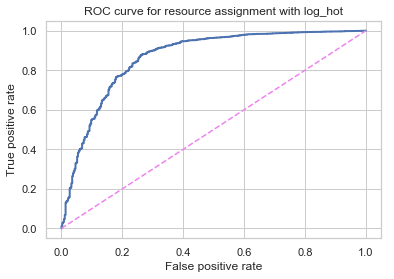

In [28]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for resource assignment with log_hot');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [31]:
with open('log_hot', 'wb') as f:
    pickle.dump(lr, f) 
#lr2=load('log_hot')

In [ ]:

#with open('filename.pkl', 'rb') as f:
 #   clf = pickle.load(f)